**FieldLevel**
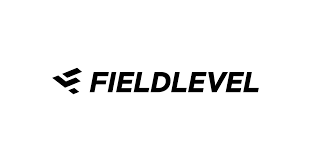

Data Science Intern Take Home Project

 By Anirudha Balkrishna

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#IMPORT LIBRARIES

import pandas as pd
import datetime as dt
import pytz as tz
import matplotlib.pyplot as plt

In [3]:
#LOAD THE DATASETS
email=pd.read_csv('/content/drive/MyDrive/Fieldlevel-main/email_data.csv',delimiter=',')
activity = pd.read_csv('/content/drive/MyDrive/Fieldlevel-main/activity_data.csv',delimiter=',')

In [4]:
#EXPLORING THE DATASETS
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474163 entries, 0 to 474162
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   LogId                    474163 non-null  int64  
 1   EmailSentDateTimeUtc     474163 non-null  object 
 2   EmailCampaignId          474163 non-null  int64  
 3   EmailOpenedDateTimeUtc   139822 non-null  object 
 4   EmailClickedDateTimeUtc  23251 non-null   object 
 5   UserId                   474163 non-null  int64  
 6   ZipCode                  322050 non-null  float64
 7   AddressData              397932 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 28.9+ MB


In [5]:
email.describe()

,LogId,EmailCampaignId,UserId,ZipCode
count,4.741630e+05,4.741630e+05,4.741630e+05,322050.000000
mean,5.494295e+11,4.064297e+11,5.484910e+11,52687.182146
std,3.175509e+11,2.549787e+11,3.170001e+11,27090.119778
min,2.140858e+06,9.203453e+09,1.621006e+07,0.000000
25%,2.743670e+11,8.283341e+10,2.732848e+11,30528.000000
50%,5.491818e+11,4.798106e+11,5.490341e+11,51503.000000
75%,8.240917e+11,6.535599e+11,8.221230e+11,76013.000000
max,1.099511e+12,1.077146e+12,1.099509e+12,99926.000000


In [6]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4559973 entries, 0 to 4559972
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   UserId             int64 
 1   DateOfActivityPST  object
 2   ActivityCount      int64 
dtypes: int64(2), object(1)
memory usage: 104.4+ MB


In [7]:
activity.describe()

,UserId,ActivityCount
count,4.559973e+06,4.559973e+06
mean,5.477764e+11,4.574190e+01
std,3.166755e+11,1.018964e+02
min,1.621006e+07,1.000000e+00
25%,2.727300e+11,6.000000e+00
50%,5.491162e+11,1.800000e+01
75%,8.192396e+11,4.600000e+01
max,1.099509e+12,9.654000e+03


In [8]:
email.head(20)

,LogId,EmailSentDateTimeUtc,EmailCampaignId,EmailOpenedDateTimeUtc,EmailClickedDateTimeUtc,UserId,ZipCode,AddressData
0,208728980120,2019-07-31 15:13:25.817,792229022220,NaN,NaN,851332105693,NaN,NaN
1,292563123584,2019-08-02 02:15:52.447,866429603262,2019-08-02 15:16:01.7533333,NaN,369293054977,NaN,NaN
2,72552047640,2019-08-07 16:21:37.293,383130475294,NaN,NaN,938684493058,NaN,NaN
3,1089121462891,2019-08-07 16:38:03.323,792229022220,NaN,NaN,50233193142,NaN,NaN
4,828770719378,2019-08-12 11:45:43.293,479810600058,NaN,NaN,369293054977,NaN,NaN
5,159172485410,2019-08-21 17:13:58.117,383130475294,NaN,NaN,245949118611,NaN,NaN
6,205248633696,2019-08-22 16:29:25.173,491462437932,NaN,NaN,666221777223,NaN,NaN
7,849677637989,2020-03-29 01:19:26.683,440300561088,NaN,NaN,862512070214,NaN,NaN
8,650350331001,2020-03-29 01:23:03.077,319208351769,2020-03-29 01:33:03.8600000,NaN,862512070214,NaN,NaN
9,391952964704,2020-03-29 16:07:05.103,440300561088,NaN,NaN,772708502669,NaN,NaN


In [9]:
#Function to Display Answers with commas

def numberwithcommas(number):
    return ("{:,}".format(number))

###**1. How many rows are in the two datasets? If the log of emails represents 3% of the emails we sent over this period, how many emails did we send? (use python to print the numbers and display them nicely with commas)**###

In [10]:
# answer in Python Code
print("The number of rows in the Email Dataset are - ",numberwithcommas(len(email)))
print("\nThe number of rows in the Activity Dataset are - ",numberwithcommas(len(activity)))
print("\nGiven that the log of emails represents only 3% of the email,\nTotal Number of Emails sent are -",numberwithcommas(round(len(email)/0.03)))

The number of rows in the Email Dataset are -  474,163

The number of rows in the Activity Dataset are -  4,559,973

Given that the log of emails represents only 3% of the email,
Total Number of Emails sent are - 15,805,433


###**2. What are the earliest and most recent dates of emails sent in this dataset in California time (Pacific Standard Time Zone)? (use python to print the date in format mm/dd/yyyy hour:minute in 24 hour time)**###

In [11]:
email['EmailSentDateTimeUtc'] = pd.to_datetime(email['EmailSentDateTimeUtc'])
pacific = email['EmailSentDateTimeUtc'].dt.tz_localize("GMT").dt.tz_convert('America/Los_Angeles')
email['Pacific'] = pacific.dt.strftime('%m/%d/%Y %H:%M')
email['UserId'] = email['UserId'].astype(int)
least_recent_date = email['Pacific'].min()
most_recent_date = email['Pacific'].max()

print("Earliest Date in PST - ",least_recent_date)
print("Recent Date in PST - ",most_recent_date)

Earliest Date in PST -  01/01/2019 04:45
Recent Date in PST -  12/31/2020 22:36


###**3. Which 10 zip codes receive the most emails and how many emails do they receive?**###

Note - I am not considering any Null values

In [12]:
email2 = email[['LogId','ZipCode']]

zip = email2.groupby(['ZipCode']).count()
zip = zip.sort_values(by='LogId',ascending=False)
zip = zip.rename(columns={"LogId": "Emails"})

zip = zip.head(10)
print(zip)

         Emails
ZipCode        
63301.0     312
33801.0     310
34210.0     299
38301.0     295
67460.0     285
95971.0     277
42301.0     266
36104.0     254
40769.0     234
85225.0     229


###**4. Plot two lines on a single graph.**###

    - total distinct users who were sent at least 1 email by month and year.
    - the monthly percentage of users who were sent an email and were active the same day 

In [13]:
activity['UserId'] = activity['UserId'].astype(int)
email['year'] = pd.DatetimeIndex(email['EmailSentDateTimeUtc']).year
email['month'] = pd.DatetimeIndex(email['EmailSentDateTimeUtc']).month
email['month1'] = pd.DatetimeIndex(email['EmailSentDateTimeUtc']).strftime("%b")
email['YrMnt'] = email['year'].astype(str)+'-'+email['month'].astype(str)
#email.head(10)
df = email.groupby(by=email['YrMnt'],as_index = False).count()
df['MonthSort'] = df['YrMnt'].str.split('-').str[1]
df['YrSort'] = df['YrMnt'].str[:4]
df['MonthSort'] = df['MonthSort'].astype(int)
df['YrSort'] = df['YrSort'].astype(int)
#df['TotalSort'] = df['MonthSort'].astype(int) + df['YrSort'].astype(int)

In [14]:
dfe = email[['UserId','Pacific','year','month','month1','YrMnt']]
df2=pd.merge(activity,dfe,on='UserId')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45868776 entries, 0 to 45868775
Data columns (total 8 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   UserId             int64 
 1   DateOfActivityPST  object
 2   ActivityCount      int64 
 3   Pacific            object
 4   year               int64 
 5   month              int64 
 6   month1             object
 7   YrMnt              object
dtypes: int64(4), object(4)
memory usage: 3.1+ GB


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45868776 entries, 0 to 45868775
Data columns (total 8 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   UserId             int64 
 1   DateOfActivityPST  object
 2   ActivityCount      int64 
 3   Pacific            object
 4   year               int64 
 5   month              int64 
 6   month1             object
 7   YrMnt              object
dtypes: int64(4), object(4)
memory usage: 3.1+ GB


In [16]:
dff= df2.groupby(by=['YrMnt','UserId'],as_index = False).count()
dff = dff[['YrMnt','UserId','Pacific']]
dff

,YrMnt,UserId,Pacific
0,2018-1,1562788827,344
1,2018-1,6277480479,6
2,2018-1,7031527634,6
3,2018-1,8323497920,264
4,2018-1,11113235298,4
...,...,...,...
346512,2021-4,1099154815763,36
346513,2021-4,1099182178338,533
346514,2021-4,1099193434956,2
346515,2021-4,1099346531306,3


In [17]:
dffg = dff[['YrMnt','Pacific']]
dffg = dffg.groupby(by=['YrMnt'],as_index=False).sum()
dffg['MonthSort'] = dffg['YrMnt'].str.split('-').str[1]
dffg['YrSort'] = dffg['YrMnt'].str[:4]
dffg['MonthSort'] = dffg['MonthSort'].astype(int)
dffg['YrSort'] = dffg['YrSort'].astype(int)
dffg = dffg.sort_values(by=['YrSort','MonthSort'])
dffg

,YrMnt,Pacific,MonthSort,YrSort
0,2018-1,96174,1,2018
4,2018-2,124774,2,2018
5,2018-3,100486,3,2018
6,2018-4,119821,4,2018
7,2018-5,240060,5,2018
8,2018-6,444947,6,2018
9,2018-7,421635,7,2018
10,2018-8,508088,8,2018
11,2018-9,577993,9,2018
1,2018-10,773413,10,2018


In [18]:
activity['year'] = pd.DatetimeIndex(activity['DateOfActivityPST']).year
activity['month'] = pd.DatetimeIndex(activity['DateOfActivityPST']).month
#activity['month1'] = pd.DatetimeIndex(activity['DateOfActivityPST']).strftime("%b")
activity['YrMnt'] = activity['year'].astype(str)+'-'+activity['month'].astype(str)
activity['UserId'] = activity['UserId'].astype(str)
df3 = activity.groupby(by=activity['YrMnt'],as_index = False).count()
df3['MonthSort'] = df3['YrMnt'].str.split('-').str[1]
df3['YrSort'] = df3['YrMnt'].str[:4]
df3['MonthSort'] = df3['MonthSort'].astype(int)
df3['YrSort'] = df3['YrSort'].astype(int)
df3 = df3.sort_values(by=['YrSort','MonthSort'])
df3

,YrMnt,UserId,DateOfActivityPST,ActivityCount,year,month,MonthSort,YrSort
0,2018-1,56099,56099,56099,56099,56099,1,2018
4,2018-2,68251,68251,68251,68251,68251,2,2018
5,2018-3,63463,63463,63463,63463,63463,3,2018
6,2018-4,68489,68489,68489,68489,68489,4,2018
7,2018-5,67971,67971,67971,67971,67971,5,2018
8,2018-6,52851,52851,52851,52851,52851,6,2018
9,2018-7,50766,50766,50766,50766,50766,7,2018
10,2018-8,63821,63821,63821,63821,63821,8,2018
11,2018-9,72994,72994,72994,72994,72994,9,2018
1,2018-10,96831,96831,96831,96831,96831,10,2018


In [19]:
x = dffg['YrMnt']
y = dffg['Pacific']
y1 = (df3['ActivityCount']) 

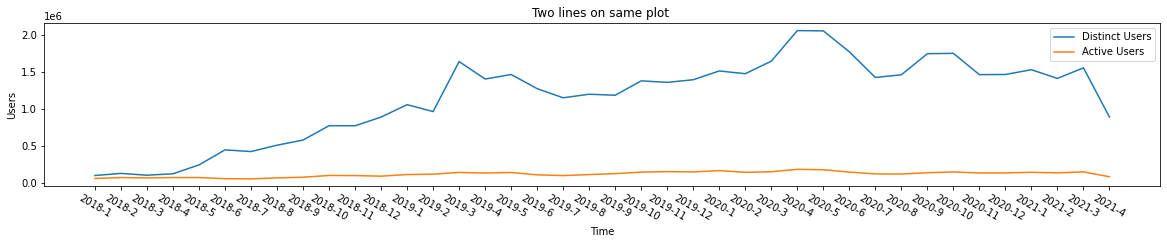

In [20]:
plt.rcParams["figure.figsize"] = (20,3)
# plotting the line 1 points 
plt.plot(x, y, label = "Distinct Users")
# line 2 points
plt.plot(x, y1, label = "Active Users")
# plotting the line 2 points 
#plt.plot(x2, y2, label = "line 2")
plt.xlabel('Time')
# Set the y axis label of the current axis.
plt.ylabel('Users')
# Set a title of the current axes.
plt.title('Two lines on same plot ')
# show a legend on the plot
plt.legend()
plt.xticks(rotation = -30)
# Display a figure.
plt.show()